SyntaxNet
====

순서
----
1. 자연어처리의 각 컴포넌트들
2. 구문 분석을 통해 가능한 일
3. 구문 분석 기술 발전
4. 딥러닝을 이용한 구문 분석기
5. SyntaxNet
6. 차별성 및 실험 결과<br/>
A. Label Bias<br/>
B. 한국어에 적용

<img src="http://t1.daumcdn.net/liveboard/emoticon/kakaofriends/v3/ryan/003.gif" width=300/>

## 1. 자연어처리의 각 컴포넌트들

NLTK 패키지를 설치합니다.

```bash
pip install nltk
```

### 문장 분리 및 토크나이징

In [1]:
import nltk
# nltk.download()

In [2]:
raw = "To you I'm nothing more than a fox like a hundred thousand other foxes. But if you tame me, then we shall need each other."

sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
sents = sent_detector.tokenize(raw)

print '========== SENTENCES =========='
print '\n'.join(sents)

print '========== TOKENIZED =========='
tokenized_sents = []
for sent in sents:
    words = nltk.word_tokenize(sent)
    tokenized_sents.append(words)
    print ' '.join(words)

========== SENTENCES ==========
To you I'm nothing more than a fox like a hundred thousand other foxes.
But if you tame me, then we shall need each other.
========== TOKENIZED ==========
To you I 'm nothing more than a fox like a hundred thousand other foxes .
But if you tame me , then we shall need each other .


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0xZugC1F8Eud0FUXxDkvRo2T9wroGWbKO9R5wdB1Nu0Fq4YdE1Q" width=300/>

### 형태소 분석

In [3]:
tagged_sents = []
for tokens in tokenized_sents:
    tagged_pairs = nltk.pos_tag(tokens)
    tagged_sents.append(tagged_pairs)
    print ' '.join(['%s/%s' % (word, tag) for word, tag in tagged_pairs])

To/TO you/PRP I/PRP 'm/VBP nothing/NN more/JJR than/IN a/DT fox/NN like/IN a/DT hundred/CD thousand/CD other/JJ foxes/NNS ./.
But/CC if/IN you/PRP tame/VBP me/PRP ,/, then/RB we/PRP shall/MD need/VB each/DT other/JJ ./.


<img src="http://core0.staticworld.net/images/article/2014/04/blank-tag-isolated-on-white-95754104-100264644-primary.idge.jpg" width=300/>

### 구문 분석

맥에서 HomeBrew를 이용해 다음과 같이 설치해 줍니다.

```bash
brew install stanford-parser
cd /usr/local/Cellar/stanford-parser/3.5.2/libexec
mkdir models
cd models
jar xf ../stanford-parser-3.5.2-models.jar
```

혹은 수동으로 다음과 같이 설치해 줍니다.

```bash
wget http://nlp.stanford.edu/software/stanford-parser-full-2015-12-09.zip
mkdir -p $HOME/nltk_data/parsers
mv stanford-parser-full-2015-12-09.zip $HOME/nltk_data/parsers
cd $HOME/nltk_data/parsers
unzip stanford-parser-full-2015-12-09.zip
cd stanford-parser-full-2015-12-09
mkdir models
cd models
jar xf ../stanford-parser-3.6.0-models.jar
```

In [4]:
import os
from nltk.parse import stanford
if False:
    # for HomeBrew installation
    STANFORD_DIR = '/usr/local/Cellar/stanford-parser/3.5.2'
    os.environ['STANFORD_PARSER'] = '%s/libexec/stanford-parser.jar' % STANFORD_DIR
    os.environ['STANFORD_MODELS'] = '%s/libexec/stanford-parser-3.5.2-models.jar' % STANFORD_DIR
    parser = stanford.StanfordParser(model_path='%s/libexec/models/edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz' % STANFORD_DIR)
else:
    # for manual installation
    STANFORD_DIR = '%s/nltk_data/parsers/stanford-parser-full-2015-12-09' % os.environ['HOME']
    os.environ['STANFORD_PARSER'] = '%s/stanford-parser.jar' % STANFORD_DIR
    os.environ['STANFORD_MODELS'] = '%s/stanford-parser-3.6.0-models.jar' % STANFORD_DIR
    parser = stanford.StanfordParser(model_path='%s/models/edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz' % STANFORD_DIR)

parsed_sents = []
for tree in parser.tagged_parse_sents(tagged_sents):
    tree_sent = '\n'.join([str(_) for _ in tree])
    parsed_sents.append(tree_sent)
    print tree_sent

(ROOT
  (S
    (PP (TO To) (NP (PRP you)))
    (NP (PRP I))
    (VP
      (VBP 'm)
      (ADJP
        (ADJP (NN nothing) (JJR more))
        (PP
          (IN than)
          (NP
            (NP (DT a) (NN fox))
            (PP
              (IN like)
              (NP
                (DT a)
                (QP (CD hundred) (CD thousand))
                (JJ other)
                (NNS foxes)))))))
    (. .)))
(ROOT
  (S
    (CC But)
    (SBAR (IN if) (S (NP (PRP you)) (VP (VBP tame) (NP (PRP me)))))
    (, ,)
    (ADVP (RB then))
    (NP (PRP we))
    (VP (MD shall) (VP (VB need) (NP (DT each) (JJ other))))
    (. .)))


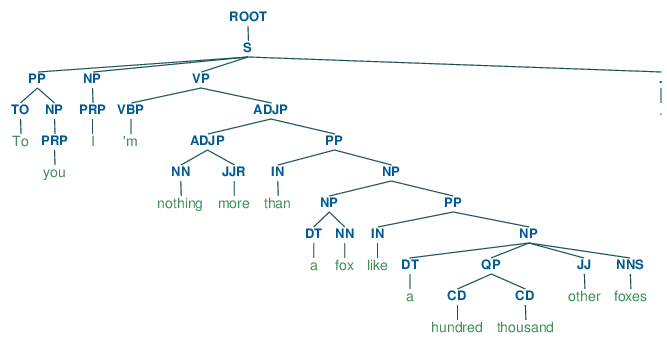

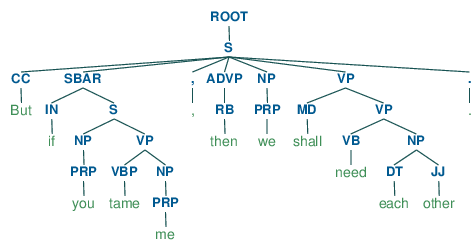

In [5]:
from IPython.display import Image, display
from nltk import Tree
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget

for idx, tree_str in enumerate(parsed_sents):
    cf = CanvasFrame()
    tree = Tree.fromstring(tree_str)
    tc = TreeWidget(cf.canvas(), tree)
    tc['node_font'] = 'arial 13 bold'
    tc['leaf_font'] = 'arial 14'
    tc['node_color'] = '#005990'
    tc['leaf_color'] = '#3F8F57'
    tc['line_color'] = '#175252'
    cf.add_widget(tc, 10, 10)
    cf.print_to_file('tmp.ps')
    cf.destroy()
    os.system('convert tmp.ps tmp.png')    # need install: libpng, ghostscript, imagemagic
    display(Image(filename='tmp.png'))
    os.remove('tmp.ps')
    os.remove('tmp.png')

<img src="http://kingofwallpapers.com/tree/tree-001.jpg" width=300/>

### 의미역 결정(SRL)

* Semantic Role Labeling
    - 술어와 그 술어에 속하는 논항들 사이의 의미 관계를 결정하는 문제
* 예제(CoNLL)
![](img/slr.png)
    - V: verb
    - A0: acceptor 
    - A1: thing accepted 
    - A2: accepted-from 
    - A3: attribute 
    - AM-MOD: modal 
    - AM-NEG: negation
* 참고: [CoNLL-2004 and CoNLL-2005 Shared Tasks](http://www.cs.upc.edu/~srlconll/)

### 개체명 인식(NER) 및 단어 의미 중의성 해소(WSD)

* 일반적으로 구문분석 전/후로 수행된다.
* Named Entity Recognition
    - 주로 PLO(Person, Location, Organization) 및 시간 표현을 인식하는 문제
    - 통계적 방법을 사용하기도 하지만, 사전 및 간단한 규칙으로도 비교적 쓸만한 성능을 얻는다.
* Word Sense Disambiguation
    - '배'와 같은 여러 의미를 지니는 단어에 대해, 문맥 상에서 적절한 의미를 졀정하는 문제
    - 기계 번역의 경우 target language의 대역어를 선정하는 문제와 연결되어 매우 중요


2. 구문 분석을 통해 가능한 일
----

### 자연어 이해(NLU) & 대화 관리(DM)

* Natural Language Understanding
    - 사람의 발화나 글을 기계가 이해할 수 이는 구조화된 형태로 데이터베이스에 저장하는 것
    - 반대 개념: Natural Language Generation

<img src="img/nlu.png" width=500/>

* Dialogue Management
    - 문맥과 흐름이 있는 사람과의 대화를 화자에 맞춰 관리하는 것

<img src="img/dm.png" width=500/>

* 참고: [대화 시스템 서비스 동향 및 개발 방법 (DeView 2015)](http://www.slideshare.net/deview/222-52779117)

### Question Answering

* [Facebook bAbI Task](https://research.facebook.com/researchers/1543934539189348)

* Example 1

NO | SENTENCE / QUESTION
---|---------------------------------
 1 | Mary moved to the bathroom.
 2 | John went to the hallway.
 3 | [Q] Where is Mary?  =>  [A] bathroom (based on 1)
 4 | Daniel went back to the hallway.
 5 | Sandra moved to the garden.
 6 | [Q] Where is Daniel?  =>  [A] hallway (based on 4)
 7 | John moved to the office.
 8 | Sandra journeyed to the bathroom.
 9 | [Q] Where is Daniel?  =>  [A] hallway (based on 4)
10 | Mary moved to the hallway.
11 | Daniel travelled to the office.
12 | [Q] Where is Daniel?  =>  [A] office (based on 11)
13 | John went back to the garden.
14 | John moved to the bedroom.
15 | [Q] Where is Sandra?  =>  [A] bathroom (based on 8)

* Example 2

```
* What American cartoonist is the creator of Andy Lippincott?
  Fact: (andy_lippincott, character_created_by, garry_trudeau) 
* Which forest is Fires Creek in?
  Fact: (fires_creek, containedby, nantahala_national_forest)
* What does Jimmy Neutron do?
  Fact: (jimmy_neutron, fictional_character_occupation, inventor)
* What dietary restriction is incompatible with kimchi?
  Fact: (kimchi, incompatible_with_dietary_restrictions, veganism)
```
￼￼￼￼￼￼￼￼￼￼￼￼￼￼

3. 구문 분석 기술 발전
----

구구조 문법과 의존 문법

![](https://upload.wikimedia.org/wikipedia/commons/8/8e/Thistreeisillustratingtherelation%28PSG%29.png)

### 구구조 문법(Phrase Structure Grammar)

* [Lexicalized PCFGs](http://www.cs.columbia.edu/~mcollins/courses/nlp2011/notes/lexpcfgs.pdf) - [Michael Collins](http://www.cs.columbia.edu/~mcollins/)

* [Stanford Parser](http://nlp.stanford.edu/software/lex-parser.shtml) - [Christopher Manning](http://nlp.stanford.edu/manning/)

* Chart parsing ([CYK algorithm](https://en.wikipedia.org/wiki/CYK_algorithm)) => ___O(n^3)___

### 의존 문법(Dependency Grammar)

* [CoNLL-X (2006) Multi-lingual Dependency Parsing](http://ilk.uvt.nl/conll/)

* [MSTParser](http://www.seas.upenn.edu/~strctlrn/MSTParser/MSTParser.html) (graph based) - [Ryan McDonald](http://www.ryanmcd.com/index.html)
    - [Minimum spanning tree](https://en.wikipedia.org/wiki/Minimum_spanning_tree) algorithm => ___O(n^2)___

* [MaltParser](http://www.maltparser.org/) (transition based) - [Joakim Nivre](http://stp.lingfil.uu.se/~nivre/)
    - [Shift-reduce parser](https://en.wikipedia.org/wiki/Shift-reduce_parser) => ___O(n)___


4. 딥러닝을 이용한 구문분석기
----

* [A Fast and Accurate Dependency Parser using Neural Networks](http://cs.stanford.edu/people/danqi/papers/emnlp2014.pdf) - Chen and Manning, 2014

### Arc-Standard Parser

* Transition based,
    - shift
    - left-arc
    - right-arc

![](http://www.postype.com/files/2016/05/14/14/34/dbf98b20d640cf3fe8daece7108466ac.gif)

<img src="img/transition.png" width=700/>

### Neural Network Architecture

<img src="img/stanford_nn.png" width=700/>

### Results

<img src="img/stanford_results.png" width=500/>


5. SyntaxNet
----

* [Google 자연어 처리 오픈소스 SyntaxNet 공개](http://cpuu.postype.com/post/166917/)
    - [GitHub](https://github.com/tensorflow/models/tree/master/syntaxnet)
* [Structured Training for Neural Network Transition-Based Parsing](http://arxiv.org/abs/1506.06158) - Weiss et al. 2015
* <s>Globally Normalized Transition-Based Neural Networks - Andor et al. 2016</s>

### Neural Network Architecture

<img src="img/google_nn.png" width=500/>

* 구조적 차이점
    - ReLU vs cube
    - more hidden layers
    - perceptron layer


6. 차별성 및 실험 결과
----

### Semi-Supervised Structured Learning

* Backpropagation Pretraining
    - with fixed two hidden layers
    - like Chen and Manning

* Structured Perceptron Training
    - output of two hidden layers and softmax layer
    - as input of perceptron layer
    - find decision sequences with beam search

* Incorporating Unlabeled Data
    - tri-training
    - use only agreed auto-parsed sentence with BerkeleyParser and ZPar

#### Results

* Comparison with WSJ

<img src="img/result1.png" width=400/>

* Number of Hidden Layers

<img src="img/result2.png" width=400/>

* Number of Beams

<img src="img/result3.png" width=400/>

* Tri-training

<img src="img/result4.png" width=300/>


A. Label Bias
----

* HMM

<img src="img/hmm.png" width=500/>

* MEMM

<img src="img/memm1.png" width=500/>

* Label Bias
    - Local Normalization

<img src="img/local_norm.png" width=500/>

    - Global Normalization

<img src="img/global_norm.png" width=500/>

* from MEMM to CRF

<img src="img/memm2.png" width=700/>

<img src="img/crf.png" width=700/>

* 참고: [Conditional Random Fields](http://www.cs.stanford.edu/~nmramesh/crf)


B. 한국어에 적용
----

* 한국어에 적용할 경우 사용하기 가장 용이한 코퍼스는 바로 [세종 코퍼스](https://ithub.korean.go.kr/user/corpus/referenceManager.do)입니다.

* 세종 코퍼스는 Penn TreeBank와 같은 구구조 코퍼스입니다. 따라서, 이를 의존 코퍼스로 변환해야 합니다.

* SyntaxNet의 입력 포맷은 CoNLL 포맷이므로, 변환한 의존 코퍼스는 이 포맷에 맞춰줘야 합니다.

* 바로 적용하기 곤란한 차이점
    - 한국어의 경우 어절 단위로 의존 관계를 표시하므로, 단어 단위인 영어와는 많이 다릅니다. 이로 인해 (여러 형태소로 이뤄진) 어절 내에서 추출할 수 있는 다양한 자질을 활용할 수 없게 됩니다.
    - 어절 내에서 형태소 간의 의존 관계를 정의하여 형태소 단위의 의존 관계를 표현할 수도 있는데, 이러한 실험은 [이곳](https://github.com/dsindex/syntaxnet)을 참고하시기 바랍니다.
    - 문장 전체의 헤드는 보통 술어가 됩니다. 영어와 달리 한국어는 술어가 맨 마지막에 나타납니다. 따라서, 한국어의 경우 오른쪽에서 왼쪽으로 (영어와는 반대로) 진행하는 것이 더 낫다고 합니다.


<img src="http://mblogthumb3.phinf.naver.net/20160315_62/mkhjsk_14580230501257QzLz_GIF/005.gif?type=w2" width=300/>